<a href="https://colab.research.google.com/github/charithcherry/MLnow_2.0/blob/main/PandasProfiling/EDATitanicDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

## Table of Contents

1. [Introduction](#section1)<br>
2. [Problem statement](#section2)
3. [Importing dependencies](#section3)
4. [Data Loading and Description](#section)
5. [Data Profiling](#section3)
    - 5.1   [Understanding the Dataset](#section301)<br/>
    - 5.2   [Pre Profiling](#section302)<br/>
    - 5.3   [Preprocessing](#section303)<br/>
    - 5.4   [Post Profiling](#section304)<br/>
6. [Questions](#section6)
    - 6.1.  [What was the demographic structure of Titanic passengers?](#section601)<br/>
    - 6.2.  [What is the survival ratio of Titanic passengers?](#section602)<br/>
    - 6.3.  [Who is more likely to survive Man, Woman or Children?](#section603)<br/>
    - 6.4.  [What is the rate of survival of man, woman and children on the basis of Ticket Class?](#section604)<br/>
    - 6.5.  [How is age related to Ticket_Class?](#section605)<br/>
    - 6.6.  [How fare is related to Age, Class and Port of Embarkation?](#section606)<br/>
    - 6.7.  [What is the survival rate considering the Embarked variable?](#section607)<br/>
    - 6.8.  [Survival rate - Comparing Embarked and Sex.](#section608)<br/>
    - 6.9.  [How survival rate vary with Embarked, Sex and Ticket_Class?](#section609)<br/>
    - 6.10. [Segment age in bins with size 10.](#section610)<br/>
    - 6.11. [Analysing SibSp and Parch variable.](#section611)<br/>
    - 6.12. [Segment fare in bins of size 12.](#section612)<br/>
    - 6.13. [Draw pair plot to know the joint relationship between 'Fare','Age','Ticket_Class' and 'Survived'](#section613)<br/>
    - 6.14. [Establish coorelation between all the features using heatmap.](#section614)<br/>
    - 6.15. [Hypothesis: Women and children are more likely to survive](#section615)<br/>
7. [Conclusions](#section7)<br/>  

<a id=section1></a>
### 1. Introduction 

<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/titanic-body.jpg" width="600" height="300" /></center>
<br> 

- The sinking of the RMS Titanic in the early morning of __15 April 1912, four days into the ship's maiden voyage__ from __Southampton to New York City__, was one of the deadliest peacetime maritime disasters in history, __killing__ more 
than **1,500 people**. 

- The largest passenger liner in service at the time, Titanic had an __estimated 2,224 people on board__ when she struck an __iceberg in the North Atlantic__. 

- The ship had received __six warnings__ of sea ice but was travelling at near __maximum speed when the lookouts sighted the iceberg__. 

<br> 
<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/source.gif" width="500" height="300" /></center>
<br> 

- __Unable to turn quickly enough__, the ship suffered a glancing blow that buckled the starboard (right) side and opened __five of sixteen compartments to the sea__. 

- The disaster caused widespread outrage over the lack of lifeboats, lax regulations, and the __unequal treatment__ of the three passenger classes __during the evacuation__. 

- Inquiries recommended sweeping changes to maritime regulations, leading to the __International Convention for the Safety of Life at Sea (1914)__, which continues to govern maritime safety.



<a id=section1></a>
### 2. Problem Statement

- On __April 15, 1912__, the largest passenger liner ever made collided with an __iceberg__ during her maiden voyage. 

- When the __Titanic sank it killed 1502 out of 2224 passengers and crew__.

- This __sensational__ tragedy shocked the international community and led to better safety regulations for **ships**. 

- One of the reasons that the **shipwreck** resulted in such loss of life was that there were **not enough lifeboats** for the passengers and crew. 

- Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others such as **women, children, and the upper-class.**

<br> 
<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/anigif_sub-buzz-2417-1580340238-6.gif" width="600" height="360" /></center>
<br> 

- The **`titanic.csv`** file contains data for **891** of the real Titanic passengers. 
  - Each row represents one person. 

  - The columns describe different attributes about the person including whether they survived, their age, their ticket-class, their sex and the fare they paid.

<br> 

- The goal of this analysis is to analyse the data set, explore it answering related questions using data visualization and statistical methods. 

- There are also some questions we would like to answer with Titanic dataset analysis.

  - What is passengers demographic structure analyzed in terms of attributes?

  - What is the overall passengers survival ratio?

  - Which groups have higher chances for survival?

### 3.Importing packages                                          

In [ ]:
import numpy as np                                                 # Implements multi-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling                                            # For simple Exploratory data analysis
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output



### 4.Data loading and Description

#### Importing the Dataset

In [ ]:
titanic_data = pd.read_csv("https://raw.githubusercontent.com/hrishi1234/ML-MODELS/master/train%20(1).csv")     # Importing the titanic dataset using pd.read_csv
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/download%20(1).png" width="300" height="180" /></center>

- The dataset consists of the information about people boarding the famous RMS Titanic. Various variables present in the dataset includes data of age, sex, fare, ticket etc. 
- The dataset comprises of __891 observations of 12 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| PassengerId   | Passenger Identity                                        | 
| Survived      | Whether passenger survived or not: 0 = People died,   1 = People survived                         |  
| Pclass        | Class of ticket: 1 = First Class, 2 = Second class, 3 = Third class                                         | 
| Name          | Name of passenger                                         |   
| Sex           | Sex of passenger                                          |
| Age           | Age of passenger                                          |
| SibSp         | Number of sibling and/or spouse travelling with passenger |
| Parch         | Number of parent and/or children travelling with passenger|
| Ticket        | Ticket number                                             |
| Fare          | Price of ticket                                           |
| Cabin         | Cabin number                                              |
| Embarked      | Source of the passenger                                   |


- Renaming the Column Pclass by Ticket_Class as the name can create confusion and since it is the class of ticket so Ticket_Class will be more suitable for it

In [ ]:
titanic_data.rename(columns={'Pclass':'Ticket_Class'},inplace=True)
titanic_data.head()

,PassengerId,Survived,Ticket_Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 5. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id=section301></a>

### 5.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end


In [ ]:
titanic_data.shape                                                    # This will print the number of rows and comlumns of the Data Frame

(891, 12)

**Observations:**
- titanic_data has __891 rows__ and __12 columns.__

In [ ]:
titanic_data.columns                                            # This will print the names of all columns.

Index(['PassengerId', 'Survived', 'Ticket_Class', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic_data.info()                                                   # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Ticket_Class    891 non-null int64
Name            891 non-null object
Sex             891 non-null object
Age             714 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Cabin           204 non-null object
Embarked        889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Observations:**
- We can see that there are **missing data** as all features do not contain **equal number of records**.
- All the **variables** are present in **appropriate data types**.

In [ ]:
titanic_data.describe()

,PassengerId,Survived,Ticket_Class,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7235248410>,
      dtype=object)

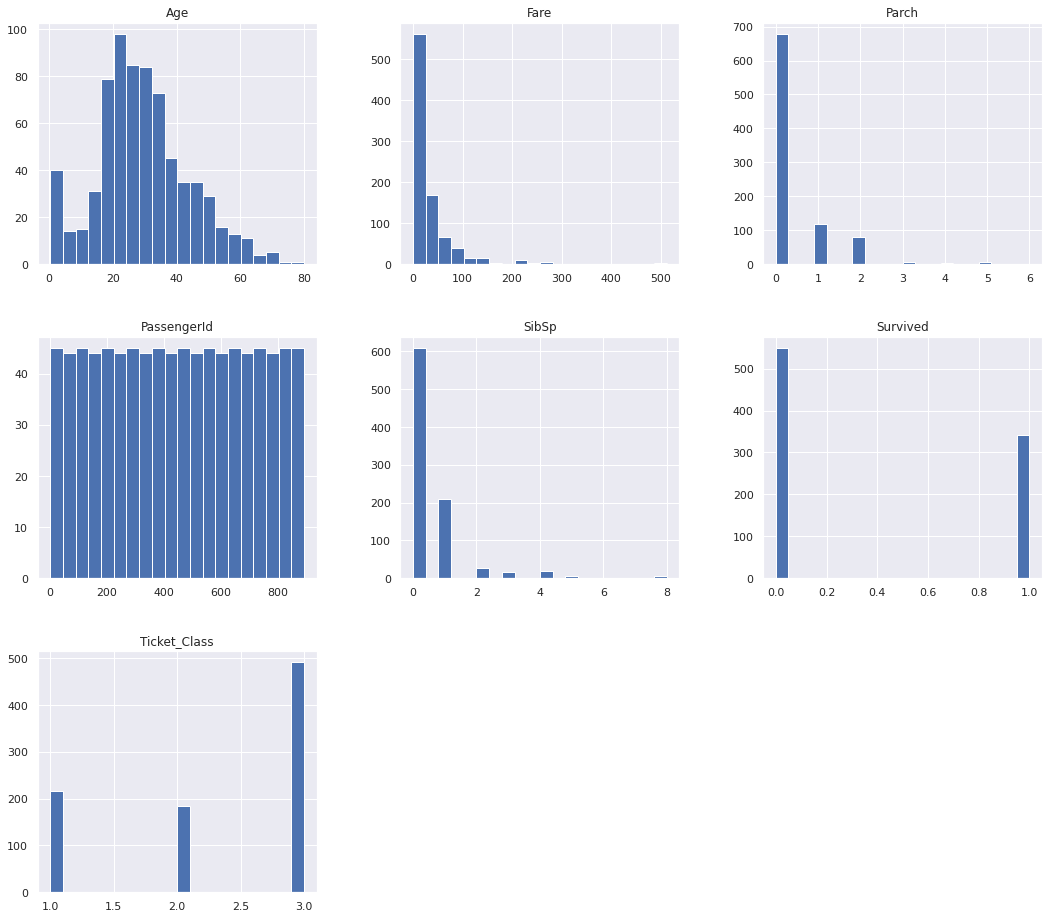

In [ ]:
titanic_data.hist(bins=20,figsize=(18, 16))

**Observations:**
- The mean of the **Age** of the passengers is found to be **29.7** years with quite large standard deviation of 14.5264. Age distribution is centered around 20-30 years ranging to 80 with quite large number of children aged 0-5. The minimum age is 0.42 years and the maximum age is 80 years. The median value is 28 years.

- On average, Passengers were not travelling with their *parents and children*.

- The maximum fare is found to be **512** dollars. Fare attribute values distribution is strongly positevely skewed with mean 32.2042 and large stadard deviation of 49.6934. Because the distribution is skewed median is much smaller than the mean with value of 14.4542. The range of data is large ranging from 0 to 512. At the same time 75% of the data is lower than 31.

- Ticket_Class distribution shows that almost 500 out of all 891 passengers in the dataset were travelling the third class and 200 passengers were travelling both in first and second class.

- SibSp (number of siblings/spouses aboard) is similar to Parch distribution but with larger number of passengers travelling with one sibling/spouse.

- Survived obviously shows only two values but we can also see that number of survivors is much smaller than the number of passengers who died in the disaster.

### 5.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [ ]:
!pip install pandas==0.25                    # You need to install pandas version 0.25 for pandas profiling or it might give some error while profiling

     |████████████████████████████████| 10.4MB 5.4MB/s 
ERROR: xarray 0.18.2 has requirement pandas>=1.0, but you'll have pandas 0.25.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 0.25.0 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement pandas>=1.0.4, but you'll have pandas 0.25.0 which is incompatible.
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


In [ ]:
profile = pandas_profiling.ProfileReport(titanic_data)
profile.to_file(outputfile="titanic_before_preprocessing.html")

/usr/local/lib/python3.7/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __titanic_before_preprocessing.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it.

**Observations from Pandas Profiling before Data Processing**
__Dataset info__:
- Number of variables: 12
- Number of observations: 891
- Missing cells: 8.1%

__Variables types__: 
- Numeric = 6
- Categorical = 4
- Text (Unique) = 1
- Rejected = 0



- **Survived** has two distinct values.
- The mean of **Age** is found to be **29.7**
- The maximum **Fare** is found to be **512** with an average of **32.2**
- The passengers were embarked from 3 ports of which **Southampton** has the highest number of passengers


###5.3 Preprocessing

- Dealing with missing values<br/>
    - Dropping/Replacing missing entries of __Embarked.__
    - Replacing missing values of __Age__ with median values.
    - Dropping the column __'Cabin'__ as it has too many _null_ values.
    - Dropping the column __'PassengerID'__,__'Name'__ and __'Ticket'__

In [ ]:
titanic_data.isnull().sum()

PassengerId       0
Survived          0
Ticket_Class      0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
dtype: int64

**Observations:**
- From the above output we can see that __Age__ and __Cabin__ columns contains __maximum null values__. We will see how to deal with them.

- Since Embarked is having 2 null values so we will fill those values with the mode of the Embarked column

In [ ]:
a=titanic_data['Embarked'].mode()[0]
a

'S'

In [ ]:
titanic_data.Embarked = titanic_data.Embarked.fillna(titanic_data['Embarked'].mode()[0]) # replacing the missing entries of Embarked with the mode

- Since Age is having 177 missing entries, so we will fill the entries with the median of the Age column

In [ ]:
median_age = titanic_data.Age.median()                                              
titanic_data.Age.fillna(median_age, inplace = True)                                         # replacing the missing entries of the column Age with the median

- Since the column Cabin has lots of missing entries, so we are dropping that column from the data frame

In [ ]:
titanic_data.drop('Cabin', axis = 1,inplace = True)                                 # dropping the column Cabin as there are too many missing entries

- Since the columns PassengerID,Name and Ticket does not make any differences to our analysis, so we will drop those columns as well  

In [ ]:
titanic_data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

- Creating a new column **FamilySize** by adding **SibSp** and **Parch** and **self**

In [ ]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']+1

- Segmenting __Sex__ column as per __Age__, Age less than 15 as __Child__, Age greater than 15 as __Males and Females__ as per their gender.

In [ ]:
titanic_data['People_Class'] = titanic_data.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)

In [ ]:
titanic_data['People_Class'].unique()

array(['male', 'female', 'child'], dtype=object)

In [ ]:
titanic_data[titanic_data.Age<15].head()   #displaying only the child class

,Survived,Ticket_Class,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,People_Class
7,0,3,male,2.0,3,1,21.0750,S,5,child
9,1,2,female,14.0,1,0,30.0708,C,2,child
10,1,3,female,4.0,1,1,16.7000,S,3,child
14,0,3,female,14.0,0,0,7.8542,S,1,child
16,0,3,male,2.0,4,1,29.1250,Q,6,child


In [ ]:
titanic_data[titanic_data.Age>15].head()

,Survived,Ticket_Class,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,People_Class
0,0,3,male,22.0,1,0,7.2500,S,2,male
1,1,1,female,38.0,1,0,71.2833,C,2,female
2,1,3,female,26.0,0,0,7.9250,S,1,female
3,1,1,female,35.0,1,0,53.1000,S,2,female
4,0,3,male,35.0,0,0,8.0500,S,1,male


- Since male and female does'not look suitable for People_Class so let's change it to Man and Woman respectively 

In [ ]:
titanic_data['People_Class']=titanic_data['People_Class'].map({'male':'Man','female':'Woman','child':'Children'})
titanic_data.head()

,Survived,Ticket_Class,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,People_Class
0,0,3,male,22.0,1,0,7.2500,S,2,Man
1,1,1,female,38.0,1,0,71.2833,C,2,Woman
2,1,3,female,26.0,0,0,7.9250,S,1,Woman
3,1,1,female,35.0,1,0,53.1000,S,2,Woman
4,0,3,male,35.0,0,0,8.0500,S,1,Man


In [ ]:
titanic_data[titanic_data.Age<15].head() 

,Survived,Ticket_Class,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,People_Class
7,0,3,male,2.0,3,1,21.0750,S,5,Children
9,1,2,female,14.0,1,0,30.0708,C,2,Children
10,1,3,female,4.0,1,1,16.7000,S,3,Children
14,0,3,female,14.0,0,0,7.8542,S,1,Children
16,0,3,male,2.0,4,1,29.1250,Q,6,Children


## 5.4 Post Pandas Profiling

In [ ]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(titanic_data)
profile.to_file(outputfile="titanic_after_preprocessing.html")

Now we have preprocessed the data, now the dataset doesnot contain missing values, we have also introduced new feature named __FamilySize__. So, the pandas profiling report which we have generated after preprocessing will give us more beneficial insights. You can compare the two reports, i.e __titanic_after_preprocessing.html__ and titanic_before_preprocessing.html.<br/>
In titanic_after_preprocessing.html report, observations:
- In the Dataset info, Total __Missing(%)__ = __0.0%__ 
- Number of __variables__ = __13__ 
- Observe the newly created variable FamilySize, Click on Toggle details to get more detailed information about it.

<a id=section4></a>

### 6. Exploratory Data Analysis

### 6.1. What was the demographic structure of Titanic passengers?

In [ ]:
titanic_age_groups = pd.cut(titanic_data["Age"], bins=[0, 15, 25, 40, 60, 80]).value_counts().sort_index()
titanic_age_groups

(0, 15]      83
(15, 25]    218
(25, 40]    263
(40, 60]    128
(60, 80]     22
Name: Age, dtype: int64

- 83 passengers were children in age 0-15. A little over 200 of passengers were both between 15-25 and 263 of them were 25-40 years old. Almost 128 of all passengers were 40-60 years old. Only 22 of all passengers were above 60 years old. That tells us that Titanic passengers population was quite young.

In [ ]:
titanic_data["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

- You can notice that the youngest passenger was 5 months old (0.42 year old). Let's see who he or she was?

In [ ]:
titanic_data.loc[titanic_data["Age"].argmin()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  """Entry point for launching an IPython kernel.


Survived               1
Ticket_Class           3
Sex                 male
Age                 0.42
SibSp                  0
Parch                  1
Fare              8.5167
Embarked               C
FamilySize             2
People_Class    Children
Name: 803, dtype: object

- It was a boy named Assed Alexander Thomas born in Hardīn, Lebanon on 8 November 1911.

- From the above information we can see that the child survived

In [ ]:
titanic_sibsp = titanic_data["SibSp"].value_counts()
titanic_sibsp

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Observations:

- 608 passengers travelled without any siblings or spouse. 

- 209 passengers travelled with one child or spouse. 

- Only 74 passengers traveled with more than one sibling or spouse.

In [ ]:
titanic_parch = titanic_data["Parch"].value_counts()
titanic_parch

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

The situation is pretty similar in case of passengers travelling with parents or children. 

- Most of them (678) travelled alone and 118 travelled with just one parent or children. 

- 95 passengers travelled with two and more parents or children.

In [ ]:
titanic_fare_groups = pd.cut(titanic_data["Fare"], bins=[0, 30, 60, 150, 550]).value_counts().sort_index()
titanic_fare_groups

(0, 40]       700
(40, 60]       54
(60, 150]      93
(150, 550]     29
Name: Fare, dtype: int64

- The first class tickets ranged enormously in price, from 150 dollars for a simple berth, up to 512 dollars for one of the two Parlour suites. 

- Second class tickets were 60 dollars and third class passengers paid between 15 and 40 dollars.

In [ ]:
titanic_embarked = titanic_data["Embarked"].value_counts()
titanic_embarked.index = ["Southampton", "Cherbourg", "Queenstown"]
titanic_embarked

Southampton    646
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: int64

- We can see that vast majority of passengers, 644, embarked in Southampton), 168 embarked in Cherbourg and only 77 of passengers embarked Titanic in Queenstown.

### 6.2. What is the survival ratio of Titanic passengers?

Survival ratio metric is defined as the ratio between the number of survived passengers and the overall number of passengers.

In [ ]:
titanic_survived = titanic_data["Survived"].value_counts(sort=False)
titanic_survived.index = ["Not Survived", "Survived"]
titanic_survived

Not Survived    549
Survived        342
Name: Survived, dtype: int64

In [ ]:
def get_survival_ratio(passengers_df):
    return passengers_df["Survived"].sum()/passengers_df["Survived"].count()

In [ ]:
survival_ratio = get_survival_ratio(titanic_data)
survival_ratio

0.3838383838383838

- Out of 891 passengers only 342 survived and 549 died. The Titanic survival ratio is approximately 0.38, meaning that only 38% of all passengers survived the disaster. That is really small percentage.

- Using Countplot

Text(0.5, 1.0, 'Count plot for Survived')

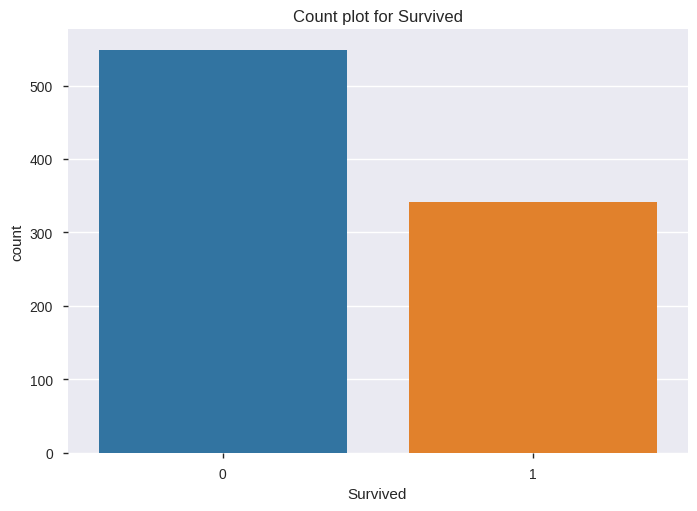

In [ ]:
sns.countplot(x='Survived', data=titanic_data).set_title('Count plot for Survived')

**Observations:**
- You can see that __more people died than survived.__ 



### 6.3. Who is more likely to survive Men, Women or Children?

- First of all looking at how __Age is varying with gender.__

Text(0.5, 1.0, 'Age distribution using FacetGrid')

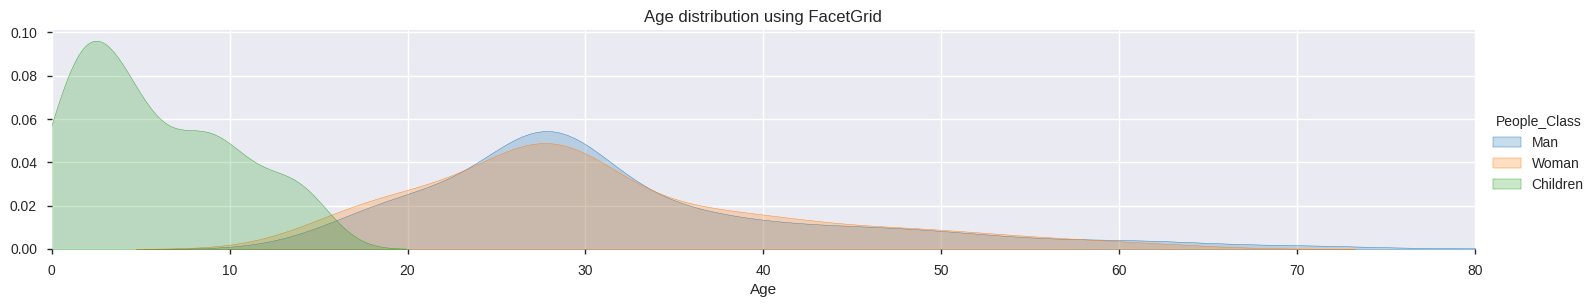

In [ ]:
as_fig = sns.FacetGrid(titanic_data,hue='People_Class',aspect=5)

as_fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_data['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()
plt.title('Age distribution using FacetGrid')

**Observations:**
- In titanic RMS __Children__ of Age __3-8__ yrs are in majority.
- Maximum __Men and Women__ are of Age __25-35__ yrs. 

Using groupby

In [ ]:
titanic_data.groupby(['Survived','People_Class'])['Survived'].count()

**Observations:**
- From the above you can see that its __difficult__ to absorb information quickly by looking at __numbers.__ Therefore we will make variety of plots to get clear vision of the scenario.

- Using factorplot 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Factor plot for man woman and children')

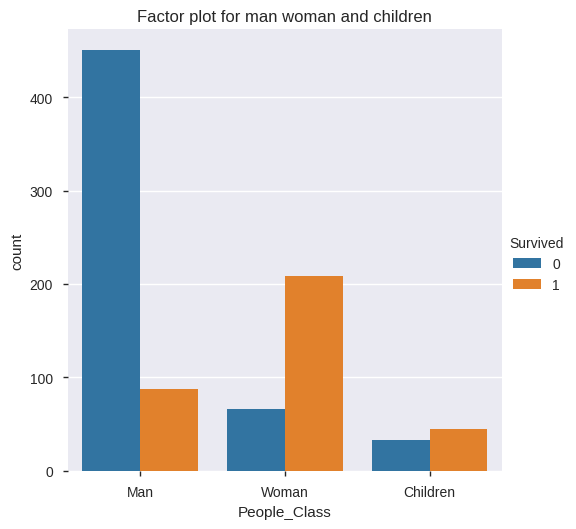

In [ ]:
sns.factorplot('People_Class', hue='Survived', kind='count', data=titanic_data);
plt.title('Factor plot for man woman and children')

**Observations:**
- Majority of __males died__.
- __Females__ have high probability to __survive.__

To know the exact %

In [ ]:
print("% of women survived: " , titanic_data[titanic_data.People_Class == 'Woman']['Survived'].sum()/titanic_data[titanic_data.People_Class == 'Woman']['Survived'].count())
print("% of men survived:   " , titanic_data[titanic_data.People_Class == 'Man']['Survived'].sum()/titanic_data[titanic_data.People_Class == 'Man']['Survived'].count())
print("% of child survived:   " , titanic_data[titanic_data.People_Class == 'Children']['Survived'].sum()/titanic_data[titanic_data.People_Class == 'Children']['Survived'].count())

% of women survived:  0.76
% of men survived:    0.16356877323420074
% of child survived:    0.5769230769230769


- Using pie plot

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:3

Text(0.5, 1.0, 'Survived (Children)')

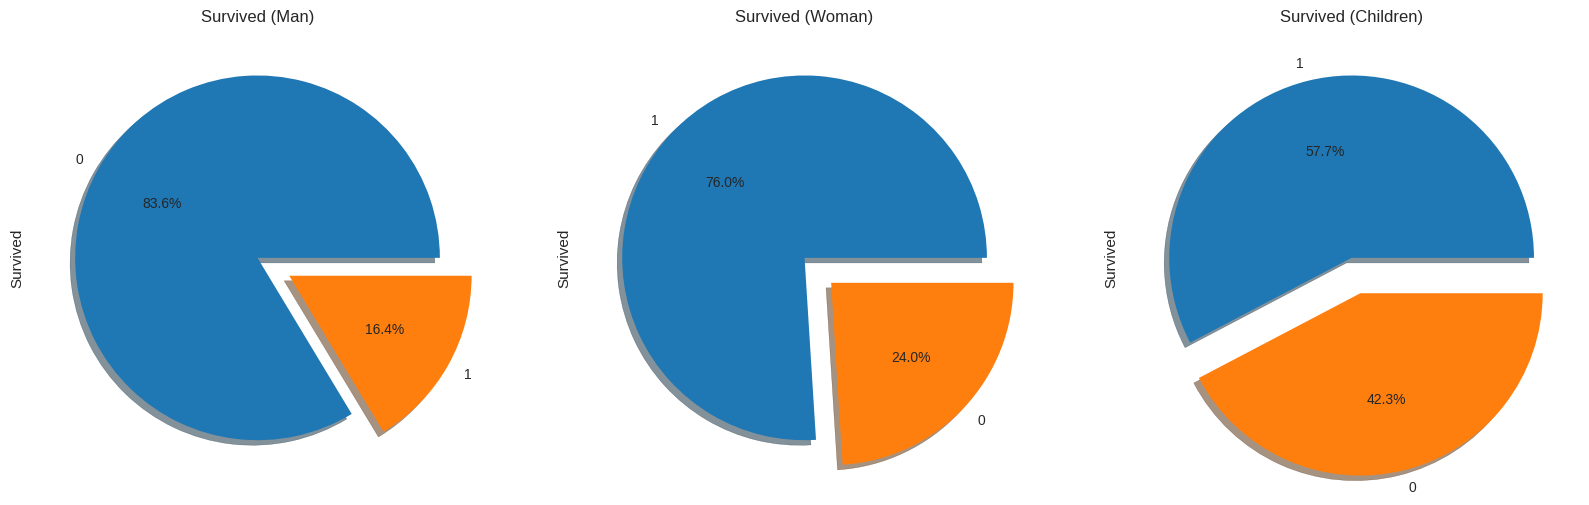

In [ ]:
f,ax = plt.subplots(1,3,figsize=(20,7))
titanic_data['Survived'][titanic_data['People_Class'] == 'Man'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
titanic_data['Survived'][titanic_data['People_Class'] == 'Woman'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
titanic_data['Survived'][titanic_data['People_Class'] == 'Children'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('Survived (Man)')
ax[1].set_title('Survived (Woman)')
ax[2].set_title('Survived (Children)')


**Observations:**
- __76% of woman__ survived.
- __57% of children__ also survived.
- Only __16% of man__ survived.

In [ ]:
titanic_data['Survived'][titanic_data['People_Class'] == 'Man'].value_counts()       #count of men survived and died

0    450
1     88
Name: Survived, dtype: int64

In [ ]:
titanic_data['Survived'][titanic_data['People_Class'] == 'Woman'].value_counts()     #count of women survived and died   

1    209
0     66
Name: Survived, dtype: int64

In [ ]:
(titanic_data.Survived==0).sum()                # Total no. of people died

549

Using __donut pie chart__ to see the relationship between __survival and gender__

In [ ]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

In [ ]:
import matplotlib.pyplot as plt
 
# Make data: 
group_names=['Survived', 'Not Survived']
group_size=[342,549]
subgroup_names=['Survived.Men','Survived.Women','Not Survived.Men','Not Survived.Women']
subgroup_size=[88,209,450,66]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors = ['yellowgreen', 'gold'])
plt.setp( mypie, width=0.3, edgecolor='white')

# wedges, texts, autotexts = ax.pie(group_size, autopct=lambda pct: func(pct, data),
                                  #textprops=dict(color="w"))
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), b(0.4), a(0.5), b(0.4)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
plt.title('Donut plot')
# show it
plt.show()


<a id=section403></a>

### 6.4. What is the rate of survival of men, women and children on the basis of Passenger Class?

- Using mathematical function

In [ ]:
print("% of survivals in") 
print("Ticket_Class=1 : ", titanic_data.Survived[titanic_data.Ticket_Class == 1].sum()/titanic_data[titanic_data.Ticket_Class == 1].Survived.count())
print("Ticket_Class=2 : ", titanic_data.Survived[titanic_data.Ticket_Class == 2].sum()/titanic_data[titanic_data.Ticket_Class == 2].Survived.count())
print("Ticket_Class=3 : ", titanic_data.Survived[titanic_data.Ticket_Class == 3].sum()/titanic_data[titanic_data.Ticket_Class == 3].Survived.count())

% of survivals in
Ticket_Class=1 :  0.6296296296296297
Ticket_Class=2 :  0.47282608695652173
Ticket_Class=3 :  0.24236252545824846


- Using crosstab function

In [ ]:
pd.crosstab([titanic_data.People_Class, titanic_data.Survived], titanic_data.Ticket_Class, margins=True).apply(lambda r: 100*r/len(titanic_data), axis=1).style.background_gradient(cmap='autumn_r')

You can see how the percentage of males, females and children survived are varying depending on the passenger class they are in. Also, its quiet difficult to develop quick insights by looking only at numbers. Therefore we will explore doing the same with the help of __plotting.__

- Using __violin plot__ to see the relationship between __Pclass and Survived__

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


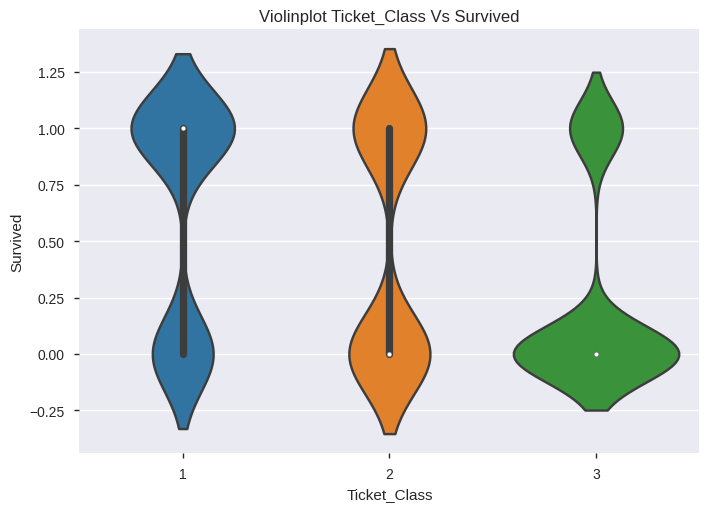

In [ ]:
sns.violinplot('Ticket_Class','Survived', kind='point', data = titanic_data)
plt.title('Violinplot Ticket_Class Vs Survived')
plt.show()

Above is another beautiful way to see how the survival rate is varying with Passenger class.

**Observations:**

- __Ticket_Class 3__ have __more__ people who __died__, and for __Ticket_Class 1 survival rate is more.__

 Drawing __factorplot__ to look at the __distribution of population__ with __Ticket_Class and People_Class.__

In [ ]:
sns.factorplot('Ticket_Class', data=titanic_data, hue='People_Class', kind='count')
plt.title('Factorplot with kind = "count" for Ticket_Class and People_Class')

**Observations:**

1. the survival rate for a man is very __low__ _irrespective of the class_ he belongs to. 
2. And, the survival rate is _less_ for all the _3rd class passengers._
3. __Almost all women__ in Ticket_Class __1 and 2 survived__ and __nearly all men__ in Ticket_Class __2 and 3 died.__

### 6.5. How is Age related to Ticket_Class ?

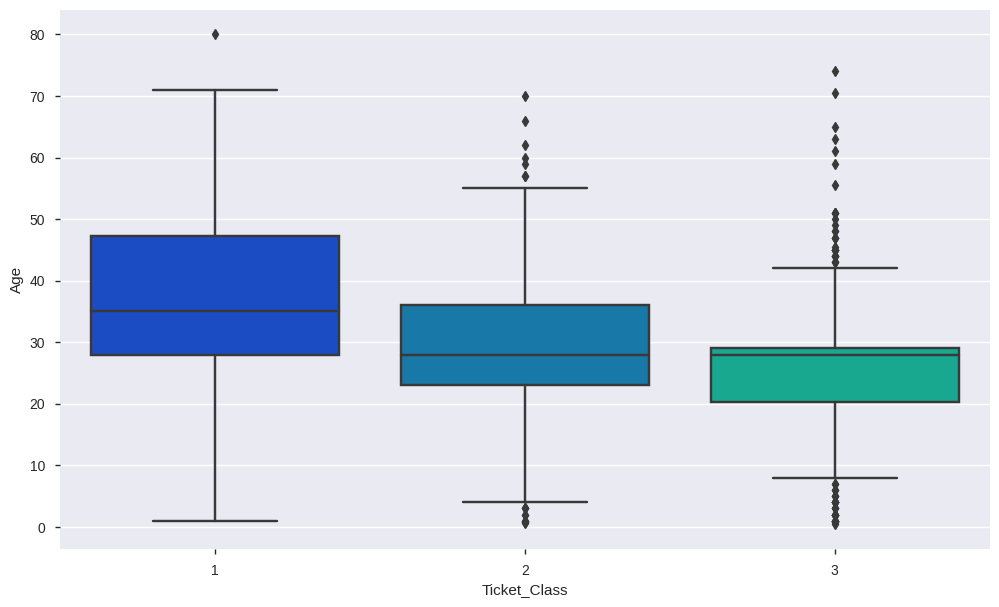

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Ticket_Class',y='Age',data=titanic_data,palette='winter')

- We can see the wealthier passengers in the higher classes tend to be higher in age

### 6.6.  How fare is related to Age, Class and Port of Embarkation ?

- Let’s see how Fare varies with respect to Age and Port of Embarkation. I will do a scatterplot of passengers from 3 classes for Age and Fare on X and Y axis.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Scatterplot of passengers w.r.t Fare and Age')

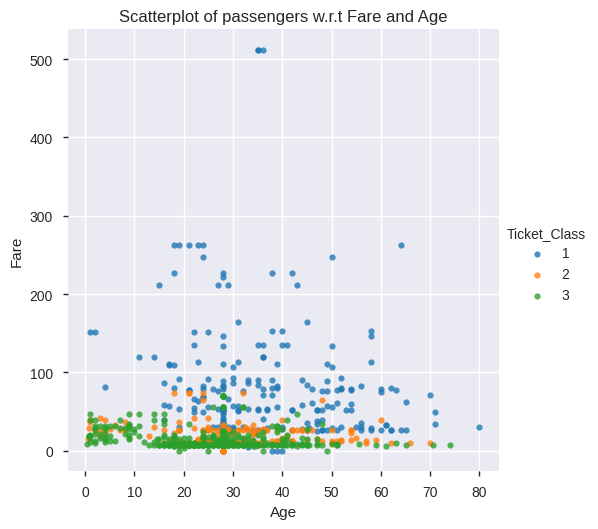

In [ ]:
sns.lmplot('Age', 'Fare', data=titanic_data, fit_reg=False, hue="Ticket_Class", scatter_kws={"marker": ".", "s": 20})
plt.title('Scatterplot of passengers w.r.t Fare and Age')

- We can segregate the passengers according to thier Port of Embarkation and then compare Fare v/s Age across 3 classes.

In [ ]:
sns.lmplot('Age', 'Fare', data=titanic_data, fit_reg=False, hue="Ticket_Class", col="Embarked", scatter_kws={"marker": ".", "s": 20})
plt.subplots_adjust(top=0.9)
plt.suptitle('Scatterplot of passengers w.r.t Fare and Age for diff. ports', fontsize=16)

 **Observations:**
- From above visualization we can see that Fare is quite uniform for **Class 2 and 3** across all **ages**. 
- Fare varies for **Class 1** across all ages.
- A lot of passengers embarked from port **Southampton**

### 6.7. What is the survival rate considering the Embarked variable?

- Using countplot 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


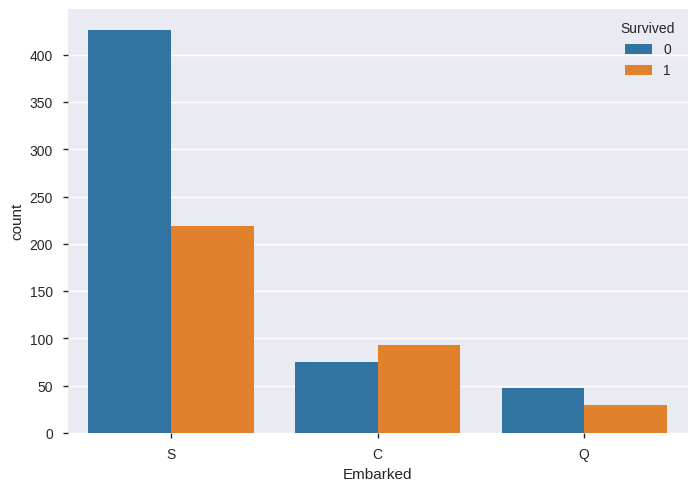

In [ ]:
sns.countplot('Embarked',data=titanic_data, hue='Survived')

**Observations:**

1. __Maximum___ number of people have __Southampton__ as port of embarkment. 
2. Also observe people who boarded at _Cherbourg_, _more_ people _survived than died_, and this is reverse for Queenstown.

<a id=section405></a>

### 6.8. Survival rate - Comparing Embarked and People_Class.

- Distribution of _People_Class_ with respect to _Port of Embarkment_ using __Countplot__.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


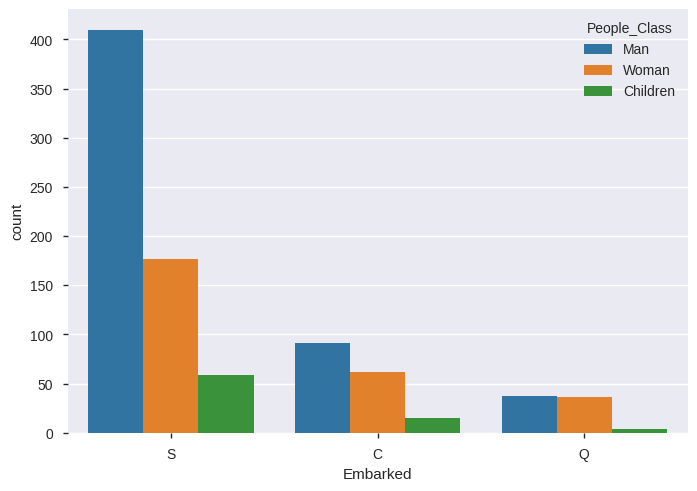

In [ ]:
sns.countplot('Embarked',data=titanic_data, hue='People_Class')

**Observations:**

- Most of the people boarded from __S__, Also among all who boarded, __man__ constitutes the __majority__ of percentage.

- Using Factorplot to see variation of __survival rate with port of embarkment and People_Class__

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


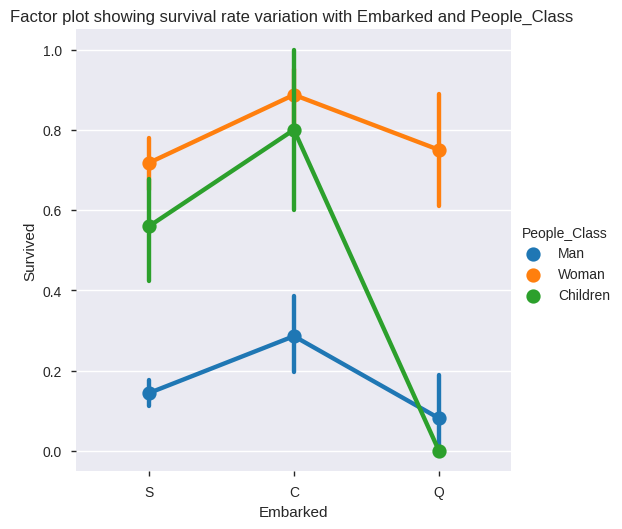

In [ ]:
sns.factorplot('Embarked','Survived', hue= 'People_Class', kind='point', data= titanic_data)
plt.title('Factor plot showing survival rate variation with Embarked and People_Class ')
plt.show()

**Observations:**

- Chances of survival of __Woman__ who boarded from __C__ is _highest_.
- Chances of survival of __Man__ boarding from __Q__ is _lowest_

### 6.9. How survival rate vary with Embarked, Sex and Ticket_Class.

Seeing relation between Ticket_Class and Embarked.

Text(0.5, 1.0, 'Relation Between Ticket_Class and Embarked')

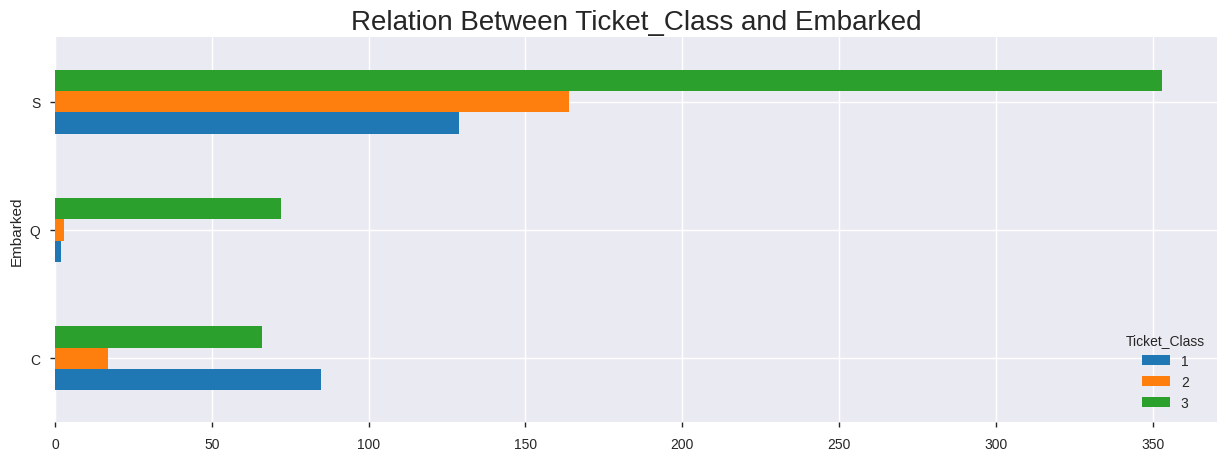

In [ ]:
relation = pd.crosstab( titanic_data.Embarked, titanic_data.Ticket_Class )
relation.plot.barh(figsize=(15,5))
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title('Relation Between Ticket_Class and Embarked',size=20)

**Observations:**

- Maximum people who boarded from __S__ belongs to __Ticket_Class 3__.<br/>
- Most of the passengers belonging to __Ticket_Class 1__ boarded from __C and S__  


In [ ]:
dummy = relation.div(relation.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Emabarked')

**Observations:**

- Practically all _women_ of __Ticket_Class 2__ that embarked in __C and Q survived__, also nearly all _women_ of __Ticket_Class 1__ survived_.
- All _men_ of __Ticket_Class 1 and 2__ embarked in __Q died__, survival rate for men in __Ticket_Class 2 and 3__ is always __below 0.2__.
- For the remaining men in Ticket_class 1 that embarked in S and Q, survival rate is approx. __0.4__

### 6.13. Draw pair plot to know the joint relationship between 'Fare','Age','Ticket_Class' and 'Survived'

In [ ]:
sns.pairplot(titanic_data[["Fare","Age","Ticket_Class","Survived"]],vars = ["Fare","Age","Ticket_Class"],hue="Survived", dropna=True,markers=["o", "s"])
plt.title('Pair Plot')

**Observations:**

- More people of Ticket_Class 1 survived than died (First peak of red is higher than blue)
- More people of Ticket_Class 3 died than survived (Third peak of blue is higher than red)
- More people of age group 20-40 died than survived.
- Most of the people paying less fare died.

<a id=section411></a>

### 6.14. Establish correlation between all the features using heatmap.

In [ ]:
corr = titanic_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

**Observations:**

- __Age and Ticket_Class are negatively corelated with Survived.__
- FamilySize is made from Parch and SibSb only therefore high positive corelation among them.
- __Fare and FamilySize__ are __positively coorelated with Survived.__
- With high corelation we face __redundancy__ issues.

<a id=section412></a>

### 6.15. Hypothesis: Women and children are more likely to survive

On studying Questionnaire 6.4 and 6.5 we observed that an overwhelming percentage of __women & children__ have survived the titanic clash.
- __76%__ of __woman__ survived.
- __57%__ of __children__ also survived.
- Only __16%__ of __man__ survived.<br/>
Also the survival rate for man is very low irrespective of the _class_ he belongs to and the _survival rate is less_ for all the _3rd class passengers._ Almost all women in Ticket_Class 1 and 2 survived and nearly all men in Ticket_Class 2 and 3 died.

<a id=section5></a>

## 7. Conclusion 

- With the help of this notebook we learnt how exploratory data analysis can be carried out using Pandas plotting.
- Also we have seen making use of packages like __matplotlib and seaborn__ to develop better insights about the data.<br/>
- We have also seen how __pre-proceesing__ helps in dealing with _missing_ values and irregualities present in the data. We also learnt how to _create new features_ which will in turn help us to better predict the survival. 
- We also make use of __pandas profiling__ feature to generate an html report containing all the information of the various features present in the dataset.
- We have seen the impact of columns like _Age, Embarked, Fare, SibSp and Parch_ on the rate of survival.
- The most important inference drawn from all this analysis is, we get to know what are the __features on which survival is highly positively and negatively correlated with.__ 
- This analysis will help us to choose which __machine learning model__ we can apply to predict survival of test dataset. 